# 聚类

熟悉各中聚类算法的调用
并用评价指标选择合适的超参数

In [2]:
#导入必要的工具包
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.decomposition import PCA
import time

import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
#读取训练数据
train = pd.read_csv('./data/MNIST_train.csv')

n_trains = 1000
y_train = train.label.values[:n_trains]
X_train = train.drop("label",axis=1).values[:n_trains]

NameError: name 'pd' is not defined

In [39]:
#将像素值[0,255]  --> [0,1]
X_train = X_train / 255.0

In [40]:
# 原始输入的特征维数和样本数目
print('the shape of train_image: {}'.format(X_train.shape))

the shape of train_image: (1000, 784)


In [41]:
#对数据进行PCA降维
pca = PCA(n_components=0.75)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)

# 降维后的特征维数
print(X_train_pca.shape)

(1000, 32)


In [42]:
# 将训练集合拆分成训练集和校验集，在校验集上找到最佳的模型超参数（PCA的维数）
X_train_part, X_val, y_train_part, y_val = train_test_split(X_train_pca,y_train, train_size = 0.8,random_state = 0)

In [43]:
#拆分后的训练集和校验集的样本数目
print(X_train_part.shape)
print(X_val.shape)

(800, 32)
(200, 32)


In [44]:
# 一个参数点（聚类数据为K）的模型，在校验集上评价聚类算法性能
def K_cluster_analysis(K, X_train, y_train, X_val, y_val):
    start = time.time()
    
    print("K-means begin with clusters: {}".format(K));
    
    #K-means,在训练集上训练
    mb_kmeans = MiniBatchKMeans(n_clusters = K)
    mb_kmeans.fit(X_train)
    
    # 在训练集和测试集上测试
    #y_train_pred = mb_kmeans.fit_predict(X_train)
    y_val_pred = mb_kmeans.predict(X_val)
    
    #以前两维特征打印训练数据的分类结果
    #plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
    #plt.show()

    # K值的评估标准
    #常见的方法有轮廓系数Silhouette Coefficient和Calinski-Harabasz Index
    #这两个分数值越大则聚类效果越好
    #CH_score = metrics.calinski_harabaz_score(X_train,mb_kmeans.predict(X_train))
    CH_score = metrics.silhouette_score(X_train,mb_kmeans.predict(X_train))
    
    #也可以在校验集上评估K
    v_score = metrics.v_measure_score(y_val, y_val_pred)
    
    end = time.time()
    print("CH_score: {}, time elaps:{}".format(CH_score, int(end-start)))
    print("v_score: {}".format(v_score))
    
    return CH_score,v_score

In [45]:
# 设置超参数（聚类数目K）搜索范围
Ks = [10, 20, 30,40,50,60]
CH_scores = []
v_scores = []
for K in Ks:
    ch,v = K_cluster_analysis(K, X_train_part, y_train_part, X_val, y_val)
    CH_scores.append(ch)
    v_scores.append(v)

K-means begin with clusters: 10
CH_score: 0.0712520036174, time elaps:0
v_score: 0.469876025208
K-means begin with clusters: 20
CH_score: 0.103269571081, time elaps:0
v_score: 0.560921961811
K-means begin with clusters: 30
CH_score: 0.108164606969, time elaps:0
v_score: 0.604986530643
K-means begin with clusters: 40
CH_score: 0.105174619296, time elaps:0
v_score: 0.587606206308
K-means begin with clusters: 50
CH_score: 0.111482791434, time elaps:0
v_score: 0.636869852782
K-means begin with clusters: 60
CH_score: 0.0916398109608, time elaps:0
v_score: 0.615547245222


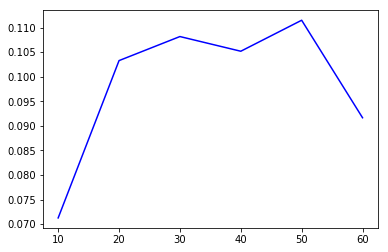

In [46]:
# 绘制不同PCA维数下模型的性能，找到最佳模型／参数（分数最高）
plt.plot(Ks, np.array(CH_scores), 'b-')

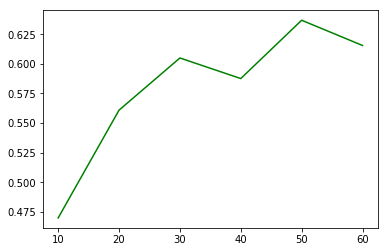

In [47]:
plt.plot(Ks, np.array(v_scores), 'g-')

两个指标的变化趋势不同:(

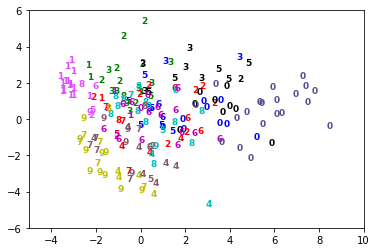

In [49]:
#显示聚类结果
#画出聚类结果，每一类用一种颜色
colors = ['b','g','r','k','c','m','y','#e24fff','#524C90','#845868']

n_clusters = 10
mb_kmeans = MiniBatchKMeans(n_clusters = n_clusters)
mb_kmeans.fit(X_train_pca)

y_train_pred = mb_kmeans.labels_
cents = mb_kmeans.cluster_centers_#质心

for i in range(n_clusters):
    index = np.nonzero(y_train_pred==i)[0]
    x1 = X_train_pca[index,0]
    x2 = X_train_pca[index,1]
    y_i = y_train[index]
    for j in range(len(x1)):
        if j < 20:  #每类打印20个
            plt.text(x1[j],x2[j],str(int(y_i[j])),color=colors[i],\
                fontdict={'weight': 'bold', 'size': 9})
    #plt.scatter(cents[i,0],cents[i,1],marker='x',color=colors[i],linewidths=12)

plt.axis([-5,10,-6,6])
plt.show()

效果并不好，7，9混在一个簇中